# Optimisation of rosenbrock and maximum likelihood functions

## Preliminaries

In [1]:
import numpy as np
import jax as jnp
from scipy.optimize import minimize
from autograd import grad, hessian
import pandas as pd
import jax.numpy as jnp
from jax import grad, hessian
from jax import random
from jax.scipy.special import expit
from typing import List, Tuple
import scipy.optimize as sy
import matplotlib.pyplot as plt
from matplotlib import cm
import os
import autograd.numpy as agnp
from autograd import grad, hessian
from scipy.misc import derivative

## Question 1
## Rosenbrock Constrained.

Due Monday, March 6, 2023

**(50 points)** Let's revisit the classic Rosenbrock function from last week. Recall that this f(x) is defined as

$$
f(\mathbf{x}) = \sum_{i=1}^{n-1} \left[ a(1 - x_i)^2 + b(x_{i+1} - x_i^2)^2 \right]
$$

for parameters \( a \) and \( b \). It is particularly well known as a test function for optimization, with many local minima. On Problem Set 4, we explored various optimizers and how well they were able to find the *unconstrained* minimum of this function. Now, consider the constrained minimization problem

$$
\min_{\mathbf{x} \in \mathbb{R}^n} \sum_{i=1}^{n-1} \left[ a(1 - x_i)^2 + b(x_{i+1} - x_i^2)^2 \right]
$$

subject to

$$
\sum_{i=1}^{n} x_i^2 = r
$$

where we constrain x to lie on the unit sphere of radius r .


### Part A

(a) Sequential Quadratic Programming with Newton’s Method: Recall that SQP is a method for
constrained optimization that attempts to solve the system of first order conditions of the Lagrangian
directly as a root finding problem.


#### Part I)
Let λ be the Lagrange multiplier on the constraint. Write down the Lagrangian L : R
n × R → R
for this problem

In [2]:
' L(x,λ)=f(x)+λg(x) '

' L(x,λ)=f(x)+λg(x) '

#### Part II)
Write a function that calculates the value of the Lagrangian as a function of the point x and the
multiplier

In [3]:
def f(a, b, x):
    n = len(x)
    sum = 0
    for i in range(1, n-1):
        sum += a*(1-x[i])**2 + b*(x[i+1]-x[i]**2)**2
    return sum

# Define the constraint function
r = 1
# Define the Lagrangian function
def lagrangian(a,b,y,r):
    x = y[:-1]
    l = y[-1]
    #defining the constraint within the 
    g = r - np.dot(x,x)
    return f(a,b,x) + l * g

#### Part III)
Write a function that calculates the gradient DL(x, λ). You can either use a package for autodifferentiation, or you can calculate the gradient by han

In [4]:
def gradfunc(a,b,y,r):
    return grad(lagrangian, argnum = 2)(a,b,y,r)

#### Part IV)
Test out your gradient on several different points (to be comprehensive, try sampling 100 points
uniformly on the unit square [0, 1]n and calculate the root mean squared error1 and compare
the results to what you would get if you use finite differences. Set a = 1, and compare the results
when b = 1 as well vs. when b = 100. What about if b = 1000? Is there a value of b where finite
differences stop working wel

In [5]:
# Define the first-order conditions
k = 100
n = 5
points = np.random.rand(k, n)


y1 = []
y2 = []
a = 1.0
λ = 0.5
b = 100

for i in range(k):
    a = 1.0
    x = points[i]
    λ = 1.0
    y = np.append(x,λ)
    gradient = grad(lagrangian, argnum = 2)(a,b,y,r)
    y1.append(gradient[:5])

#define a function to find the RMSE
def RMSE(y1, y2):
    y2 = np.array(y2)
    yhat = np.array(y1)
    return np.sqrt((1/100)*(sum(abs(y2 - yhat))**2))

h = 1e-5  # small value for finite differences

#define a function that outputs the RMSE of the gradient functions for different values of b
def tests(b): 
    y1 = []
    y1 = []
    y2 = []
    a = 1.0
    λ = 0.5
    for i in range(k):
        a = 1.0
        x = points[i]
        λ = 1.0
        y = np.append(x,λ)
        gradient = grad(lagrangian, argnum = 2)(a,b,y,r)
        y1.append(gradient[:5])
    
        
    h = 1e-5  # small value for finite differences
    
    for i in range(k):
        a = 1.0
        x = points[i]
        λ = 1.0
        y = np.append(x, λ)
    
        gradient = np.zeros_like(y)
        for j in range(len(x)):
            x_plus = x.copy()
            x_plus[j] += h
            y_plus = np.append(x_plus, λ)
            fx_plus = lagrangian(a, b, y_plus,r)
    
            x_minus = x.copy()
            x_minus[j] -= h
            y_minus = np.append(x_minus, λ)
            fx_minus = lagrangian(a, b, y_minus,r)
    
            gradient[j] = (fx_plus - fx_minus) / (2 * h)
        y2.append(gradient[:5])
    print(RMSE(y1, y2))

#testing for increasing values, as b increases, so does the RMSE
b_vals = [1,10,100,1000,10000,1000000,10000000]
for i in b_vals:
    tests(i)


'''as you can see, the RMSE increases at the highest values of b, but stays
 reasonably low for lower values, although it gradually increases'''


[7.37066061e-11 2.05318835e-09 1.97998807e-09 1.95296168e-09
 9.11340440e-11]
[2.09027219e-10 2.00918307e-08 1.93798057e-08 1.91819773e-08
 4.05717356e-10]
[1.70584700e-09 2.00721380e-07 1.93397439e-07 1.91110479e-07
 3.77325931e-09]
[1.50348486e-08 2.00142601e-06 1.93996770e-06 1.91512596e-06
 3.23165750e-08]
[1.73301384e-07 2.00309042e-05 1.92842793e-05 1.90963095e-05
 3.87932245e-07]
[1.42166158e-05 2.01063326e-03 1.93672773e-03 1.91310035e-03
 3.06897015e-05]
[0.00013539 0.01999677 0.01931884 0.01917776 0.00032361]


'as you can see, the RMSE increases at the highest values of b, but stays\n reasonably low for lower values, although it gradually increases'

#### Part V)
Of course, for Newton’s method, you actually need the Hessian as well. Write a function that
calculates the Hessian D2L(x, λ)

In [6]:
def hessian_function(f):
    hessian_lagrangian = hessian(lagrangian)(a,b,y,r)
    return hessian_lagrangian

#### Part VI)
For Newton's method on y, we calculate our next iteration as:

$$
D^2L(y^k)s^k = -DL(y^k)
$$

$$
y^{k+1} = y^k + \alpha s^k
$$

where \( \alpha = 1 \), and \( s^k \) is the solution to the linear system in the first line. Write a function that calculates the search direction \( s^k \) given an initial point \( y^k \).


In [7]:
#calculating the search direction by solving for sk
def searchdirection(a,b,y,r):
    return np.linalg.solve(hessian(lagrangian, argnum=2)(a, b, y,r), -(grad(lagrangian, argnum = 2)(a,b,y,r)))


#### Part VII)
For now, we’ll just use regular Newton’s method. Write a function that puts this all together to
take in y^k and output the next step in Newton’s method y^k+1

In [8]:
def newtons(a,b,y,r):
    return searchdirection(a, b, y,r) + y
#Solving the last line of newtons method for yk+1 by adding sk to yk

#### Part VIII)
Finally, we need to choose a stopping criterion. Since this is a root finding problem, a natural
way to choose when to stop is when DL(y) is sufficiently small. Write a function that checks for
convergence by computing the norm of the gradient ||DL(y)||2
. For any given tolerance , return
true if ||DL(y)||2 < , and false otherwise.

In [9]:
#setting the threshold value, e very low to help converge close to the minumum
e = 1e-6
def convergencechecker(a,b,e,y,r):
    gradient = grad(lagrangian, argnum = 2)(a,b,y,r)
    norm = np.linalg.norm(gradient)
    if norm>e:
        return False
    else:
        return True
#when the norm is less than the threshold value, the funciton will have converged

#### Part IX)
Let’s try it out for a simple example. Set n = 2, a = b = 1, and r = 2. Start with x0 = (0, 0) and
λ0 = 0. Make a plot showing the progress of the algorithm (plot the values of x
k at each step, the
constraint set, and the contours of f). Use a tolerance of  = 10−6
. How is the algorithm doing?

In [10]:
convergence = False
i = 0
r = 2
a = 1
b = 1
#for the sake of the question, predefine y0 with lambda, where its the last term of y0
y0 = [0.01,0.01,0.001]
y0 = np.array(y0)

#Iteration condition added in to ensure if code isnt working the loop will eventually break.
while convergence == False and i < 1000:
    yk1 = newtons(a,b,y0,r)
    y0 = yk1
    convergence = convergencechecker(a,b,e,yk1,r)
    i += 1
    print (yk1)

[50.005  50.005  -4.9995]
[25.012499  25.012499  -2.4987503]
[12.52623951 12.52623951 -1.24737815]
[ 6.30303596  6.30303596 -0.61971417]
[ 3.23084483  3.23084483 -0.30205767]
[ 1.7701807  1.7701807 -0.1365602]
[ 1.16754739  1.16754739 -0.04649001]
[ 1.01202184  1.01202184 -0.0061928 ]
[ 1.00007140e+00  1.00007140e+00 -7.31274873e-05]
[ 1.00000000e+00  1.00000000e+00 -5.22102647e-09]


#### Part X)
Now, let’s put it all together. Write a function that solves for the constrained optimum of eq. (1).
It should take as inputs: the parameters a and b, the dimension n, an initial value, as well as a
tolerance parameter (to control when to stop). It should return:
• the function value of f at the optimum you find
• the value of x that attains the minimum
• (for diagnostic purposes) the Lagrange multiplier λ
• the number of Newton steps you took,
• the norm of DL when you stopped, and
• how badly you’re deviating from the constraint

In [11]:
initial = [0.1,0.1]
lda = 0.001
def wholething(a,b,r,x,e,n,lda,initial):
    i = 0
    y0 = np.append(initial,lda)
    convergence = False
    while convergence == False and i < 1000:
        yk1 = newtons(a, b, y0, r)
        y0 = yk1
        convergence = convergencechecker(a,b,e,yk1,r)
        i += 1
        print(y0)
    print('the value of x at the minumum is', y0[:-1])
    print('the value of the function at the minimum is ', lagrangian(a,b,y,r))
    print('lambda is',yk1[-1])
    print('we took',i,'newton steps')
    print('the norm of DL was',np.linalg.norm(gradient))
    print('the devaition from the constraint is',r-sum(yk1[:-1]))

wholething(a,b,r,x,e,n,lda,initial)


[ 5.05    5.05   -0.0495]
[ 2.6240099   2.6240099  -0.02377951]
[ 1.50255301  1.50255301 -0.01016295]
[ 1.08404347  1.08404347 -0.00283071]
[ 1.00325785e+00  1.00325785e+00 -2.10951621e-04]
[ 1.00000529e+00  1.00000529e+00 -6.83905068e-07]
[ 1.00000000e+00  1.00000000e+00 -3.61753111e-12]
the value of x at the minumum is [1. 1.]
the value of the function at the minimum is  -0.17977961483606308
lambda is -3.6175311075431336e-12
we took 7 newton steps
the norm of DL was 167.9060302180173
the devaition from the constraint is -2.7979396577393345e-11


#### Part XI)
Keep r = 2, and move around your initial starting point x0. How sensitive are your results to
the initial guess? We know that in this case, the true minimum is at x such that xi = 1 for all i.
How close do you need to make x0 to the true minimum to ensure convergence?

In [36]:
x = x1vals
y = x2vals
X, Y = np.meshgrid(x, y)
Z = f(a,b,[X,Y])

# Create a contour plot
fig, ax = plt.subplots()
cs = ax.contourf(X, Y, Z, cmap="RdBu_r")
fig.colorbar(cs, ax=ax)
ax.set_title('Contour plot of Rosenbrock function')
ax.set_xlabel('x0')
ax.set_ylabel('x1')
plt.show()
# Generate mesh grids to try and create a contour map of X, Y and Z, where x and y are the values of x0 and x1 respectively as they converge to the minimum, 1.
#However, we could not work out how to implement the rosenbrock function as Z, as is required for a contour map

NameError: name 'x1vals' is not defined

#### Part XII)
Try out your function for a variety of parameters and report the results. How is the algorithm
doing?

In [12]:
'it still holds up with initial guesses of 10'
initial = [0.1,0.1]
wholething(a,b,r,x,e,n,lda,initial)
wholething(a,b,r,x,e,n,lda,initial = [20,20])
wholething(a,b,r,x,e,n,lda,initial = [50,50])
'the function seems to struggle to converge when the values of x are different'
wholething(a,b,r,x,e,n,lda,initial = [100,10])
r = 3
wholething(a,b,r,x,e,n,lda,initial)
r =2
wholething(a,b,r == 5,x,e,n,lda,initial)
'changing the value of r changes the convergence points'
a = 100000000
b =100000000
wholething(a,b,r,x,e,n,lda,initial)
'making the values of a and b very high doesnt have an effect on the convergence point'

[ 5.05    5.05   -0.0495]
[ 2.6240099   2.6240099  -0.02377951]
[ 1.50255301  1.50255301 -0.01016295]
[ 1.08404347  1.08404347 -0.00283071]
[ 1.00325785e+00  1.00325785e+00 -2.10951621e-04]
[ 1.00000529e+00  1.00000529e+00 -6.83905068e-07]
[ 1.00000000e+00  1.00000000e+00 -3.61753111e-12]
the value of x at the minumum is [1. 1.]
the value of the function at the minimum is  -0.17977961483606308
lambda is -3.6175311075431336e-12
we took 7 newton steps
the norm of DL was 167.9060302180173
the devaition from the constraint is -2.7979396577393345e-11
[1.0025e+01 1.0025e+01 4.9875e-04]
[5.06237531e+00 5.06237531e+00 2.46893672e-04]
[2.62995552e+00 2.62995552e+00 1.18629896e-04]
[1.50509504e+00 1.50509504e+00 5.07392919e-05]
[1.08475246e+00 1.08475246e+00 1.41704574e-05]
[1.00331088e+00 1.00331088e+00 1.06389649e-06]
[1.00000546e+00 1.00000546e+00 3.50502108e-09]
[1.00000000e+00 1.00000000e+00 1.91473843e-14]
the value of x at the minumum is [1. 1.]
the value of the function at the minimum is

'making the values of a and b very high doesnt have an effect on the convergence point'

### Part B
Penalty Method: Recall that the penalty method works by solving a sequence of augmented problems
min x∈Rn f(x)+Pk||g(x)||
where Pk controls the strength of the penalty for violating the constraint.

(i) Try solving the problem directly when a = b = r = 10, n = 10, and Pk = 1012. Start with x0 = 0.
Use your favorite algorithm for the unconstrained problem. (Here it’s okay to use someone else’s
implementation). How well does this fare? Do you converge? If you do, how long does it take
(how many function evaluations)?

(ii) Now try starting with P0 = 1, and solve a sequence of problems. Use the solution at k as a
“warm-start” for the k + 1th problem. Set Pk+1 = 10 × Pk at each iteration. Repeat until you
reach P12 = 1012. How do your results compare? Do you converge to the true minimum? If not,
try again with a better initial guess (remember, in this case you know where the true minimum
is). Does it improve?

(iii) Repeat with b = 1000. Does anything change?

(iv) What about with r = 1?

#### Part I)

In [13]:
def f(a, b, x, n):
    sum = 0
    for i in range(1, n-1):
        function = (a*(1-x[i])**2 + b*(x[i+1]-x[i]**2)**2)
        sum += function
    return sum

def penalty(x, Pk, params):
    a, b, r, n = params
    function4 = f(a, b, x, n) + Pk * (r - np.dot(x,x))**2
    return function4

a = b = r = n = 10
params = [a, b, r, n]
Pk = 10**12
x0 = np.zeros(n)
solution = minimize(penalty, x0, args=(Pk, params))
print(solution)


      fun: 100000000000080.0
 hess_inv: array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])
      jac: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 11
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


### Comment
This does not converge to the global minimum of x=1. This is due to the fact that the penalty Pk=10^12 is too large. To solve this problem, we can implement an incremental step for Pk, where Pk starts small and slowly inreases until the minimum is found. In this example, we return 11 function evaluations.

#### Part II)

In [14]:
Pk=1
def penalty(x, Pk, params):
    for k in range (1,13):
        Pk*=10
        a, b, r, n = params
        function4 = f(a, b, x, n) + Pk* (r - np.dot(x,x))**2
        return function4
x0 = np.ones(n) * 0
solution2 = minimize(penalty, x0, args=(Pk, params))
print(solution2)


      fun: 1.591899170756324e-12
 hess_inv: array([[ 7.71488988e-01,  1.92785532e-02,  2.24035006e-02,
         2.44033016e-02,  2.66581426e-02,  3.12844257e-02,
         4.32222102e-02,  7.33117363e-02,  1.52041670e-01,
         3.58617653e-01],
       [ 1.92785532e-02,  1.04315741e-02,  4.07097821e-03,
         1.95061612e-03,  7.05257872e-04,  7.77157661e-06,
        -1.19960918e-04,  1.67284085e-04,  4.49802000e-04,
         1.58535520e-03],
       [ 2.24035006e-02,  4.07097821e-03,  9.67288297e-03,
         3.76607835e-03,  1.46412654e-03,  5.25756531e-04,
         2.43745413e-04, -1.52695943e-04,  5.86060854e-04,
         2.24442837e-03],
       [ 2.44033016e-02,  1.95061612e-03,  3.76607835e-03,
         9.18683323e-03,  3.45348127e-03,  1.51303045e-03,
         4.82505726e-04,  1.70465818e-04,  9.28944931e-04,
         2.91973965e-03],
       [ 2.66581426e-02,  7.05257872e-04,  1.46412654e-03,
         3.45348127e-03,  9.49374695e-03,  3.40547105e-03,
         1.34935925e-03,  

### Comment
Now, when increasing Pk incremently, we find the true global solution of the array of x=1. To check, we started wtih an intial guess of x0=np.ones(n), as this is the true solution. Then, we updated the inital guess to be an array of zeros and we return the correct solution as well, confirming our results. This returns 880 function evaluations.

#### Part III)

In [15]:
a = r = n = 10
b=1000
params = [a, b, r, n]
def penalty(x, Pk, params):
    for k in range (1,13):
        Pk*=10
        a, b, r, n = params
        function4 = f(a, b, x, n) + Pk* (r - np.dot(x,x))**2
        return function4
x0 = np.ones(n)*0 
solution3 = minimize(penalty, x0, args=(Pk, params))
print(solution3)


      fun: 2.14492070305429e-10
 hess_inv: array([[5.57548767e-01, 1.52386359e-03, 2.70735517e-03, 4.64361637e-03,
        8.93192259e-03, 1.77050541e-02, 3.53339270e-02, 6.96400268e-02,
        1.39329218e-01, 2.78494219e-01],
       [1.52386359e-03, 1.64486863e-04, 7.75221508e-05, 4.91735571e-05,
        3.72196297e-05, 4.79179932e-05, 8.34542818e-05, 1.54936129e-04,
        3.05249318e-04, 6.09462314e-04],
       [2.70735517e-03, 7.75221508e-05, 1.63889805e-04, 1.03675005e-04,
        7.62511836e-05, 9.15498080e-05, 1.55896700e-04, 2.95210238e-04,
        5.79162977e-04, 1.16018761e-03],
       [4.64361637e-03, 4.91735571e-05, 1.03675005e-04, 2.28032859e-04,
        1.61571363e-04, 1.71644553e-04, 2.69967671e-04, 5.28138682e-04,
        1.03707638e-03, 2.09028534e-03],
       [8.93192259e-03, 3.72196297e-05, 7.62511836e-05, 1.61571363e-04,
        3.10351633e-04, 3.56211761e-04, 5.82928616e-04, 1.09386463e-03,
        2.17229705e-03, 4.33959856e-03],
       [1.77050541e-02, 4.791799

### Comment
Using b=1000 returns similar results, an array of x=1. However, the number of function evaluations increases to 1178, meaning it is less efficient for when b=1000 as computational time increases.

#### Part IV)

In [16]:
a = b = n = 10
r=1
params = [a, b, r, n]
def penalty(x, Pk, params):
    for k in range (1,13):
        Pk*=10
        a, b, r, n = params
        function4 = f(a, b, x, n) + Pk* (r - np.dot(x,x))**2
        return function4
x0 = np.ones(n)*0 
solution4 = minimize(penalty, x0, args=(Pk, params))
print(solution4)

      fun: 31.999101739699324
 hess_inv: array([[ 4.16621921e-02,  5.14157650e-05,  2.49191284e-05,
        -2.09726139e-05, -3.93188737e-07,  3.14574693e-06,
         4.23639560e-05, -3.46284362e-05, -7.00289615e-06,
        -2.33755692e-05],
       [ 5.14157650e-05,  1.65858009e-02,  3.12667196e-03,
        -1.74768326e-03, -3.11117979e-03, -3.05487221e-03,
        -3.25685580e-03, -3.41641466e-03, -2.13709402e-03,
        -7.93545366e-04],
       [ 2.49191284e-05,  3.12667196e-03,  1.42675692e-02,
         1.71190704e-03, -2.11058288e-03, -2.73741328e-03,
        -3.18202945e-03, -3.00065485e-03, -1.79498002e-03,
        -1.06768585e-03],
       [-2.09726139e-05, -1.74768326e-03,  1.71190704e-03,
         1.38345172e-02,  1.62499459e-03, -1.75759012e-03,
        -2.80856936e-03, -2.38655929e-03, -1.52981325e-03,
        -8.67310738e-04],
       [-3.93188737e-07, -3.11117979e-03, -2.11058288e-03,
         1.62499459e-03,  1.42861995e-02,  1.46436478e-03,
        -1.24732853e-03, -1.8

### Comment
Here, when r does not equal n, the global minimum is not found. This is seen by the fact that our output returns an x array that is not equal to 1. The number of function evaluations is, however, lower than in the previous two cases.

### Intuition
The Penalty method involves adding a penalty term to the objective function that penalizes violations of the constraints. The intuition behind the penalty method is to transform the constrained optimization problem into an unconstrained optimization problem that can be solved using standard optimization techniques. The penalty term can be chosen to be a linear or a nonlinear function of the violation of the constraints. As the penalty parameter increases, the optimal solution of the subproblem approaches the optimal solution of the original constrained optimization problem.

The penalty function is some penalty parameter that increases for each iteration, and a function that measures the violations of the constraints. In this problem the parameter started at 1 and grew by 10 for each iteration, and the penalty function was the norm of the constraint squared. The way to solve it was to minimize the following function with respect to x: f(x)+Pk||g(x)||2 . As we saw in class the penalty method is sensitive to choice of penalty parameter and its growth.



### Part C
Augmented Lagrangian: Now, let’s try implementing the Augmented Lagrangian Method. Recall
that this approach involves solving a sequence of problems
xk = arg min
x∈Rn
f(x)+
Pk
2
||g(x)||2 + λk · g(x)
Pk+1 = αPk
λk+1 = λk + Pkg(xk)

(i) Start with P0 = 1 and α = 10. Use a = b = r = 10 and n = 10. Guess x0 = 0, use your favorite
algorithm for the inner unconstrained problem, and iterate until ||λk+1 − λk||2 < 10−8
. Report
your results.
Do you find the true minimum? How large does Pk need to be when λ converges?

(ii) Compare the performance of the Augmented Lagrangian to the standard Penalty Method. Try it
for a variety of parameter values, and present your results in a nice way. What do you conclude
from this?

#### Part I)

In [17]:
def f(x: np.ndarray, a: float, b: float) -> float:
    return sum(a * (1 - x[:-1])**2 + b * (x[1:] - x[:-1]**2)**2)

def g(x: np.ndarray, r: float) -> float:
    return r - np.dot(x, x)

def objective(x: np.ndarray, a: float, b: float, P: float, λ: np.ndarray, r: float) -> float:
    return f(x, a, b) + 1/2 * P * g(x, r) ** 2 + np.dot(λ, g(x, r))

def inner_loop(P: float, λ: np.ndarray, x0: np.ndarray, a: float, b: float, r: float) -> sy.OptimizeResult:
    return sy.minimize(objective, x0, args=(a, b, P, λ, r))

def outer_loop(x0: np.ndarray, tol: float, a: float, b: float, r: float) -> np.ndarray:
    gx = g(x0, r)
    λ = np.zeros_like(gx)
    P = 1.0
    x = x0.copy()
    num_iter = 0 
    converged = False
    while num_iter < 10000 and not converged:
        res = inner_loop(P, λ, x, a, b, r)
        print(res.nfev)
        new_x = res.x
        num_iter += 1
        gx = g(new_x, r) 
        λp = λ + gx*P
        err = np.dot(g(x, r), g(x, r))
        if err < tol:
            converged = True
        else:
            P *= 10
            x = new_x
            λ = λp
    print(num_iter)
    print(P)
    return x

if __name__ == '__main__':
    a = 10
    b = 10
    r = 10
    n = 10
    x0 = np.zeros(n)
    result = outer_loop(x0, 1e-8, a, b, r)
    print(result)

308
33
2
10.0
[1.         0.99999997 1.00000001 0.99999999 0.99999997 0.99999994
 0.99999997 0.99999997 0.99999995 0.99999995]


### Comment
Yes, we find the true global minimum, equal to 1. Pk=10 when lambda converges. The optimize function itereates twice. The first iteration, the loop runs 308 times, and the second iteration the loops runs 33 times, for a total of 341.
 

#### Part II)

In [18]:
#Test for b=1000 to comapre to penalty method
if __name__ == '__main__':
    a = 10
    b = 1000
    r = 10
    n = 10
    x0 = np.zeros(n)
    result = outer_loop(x0, 1e-8, a, b, r)
    print(result)
#Test for r=1 to comapre to penalty method
if __name__ == '__main__':
    a = 10
    b = 10
    r = 1
    n = 10
    x0 = np.zeros(n)
    result = outer_loop(x0, 1e-8, a, b, r)
    print(result)

847
220
2
10.0
[0.99999998 0.99999997 0.99999995 0.99999992 0.99999986 0.99999974
 0.9999995  0.99999902 0.99999805 0.9999961 ]
308
275
275
297
242
463
6
100000.0
[0.4054433  0.34269067 0.33007562 0.32777552 0.32733053 0.32705058
 0.32586509 0.31921443 0.28074927 0.02792026]


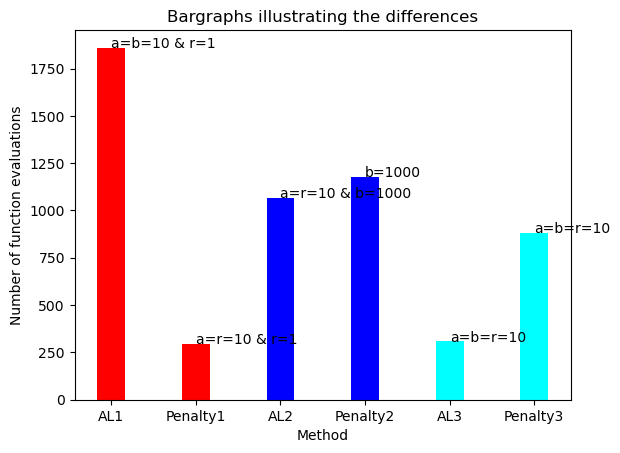

In [19]:
# Data for the bars
y_values = [1860, 297, 1067, 1178, 308, 880]
x_labels = ['AL1', 'Penalty1', 'AL2', 'Penalty2', 'AL3', 'Penalty3']
bar_width = 0.33

# Colors for the bars
colors = ['red', 'red', 'blue', 'blue', 'cyan', 'cyan']

# Plotting the bars with specified colors
plt.bar(x_labels, y_values, width=bar_width, color=colors)

# Adding title and labels
plt.title('Bargraphs illustrating the differences')
plt.xlabel('Method')
plt.ylabel('Number of function evaluations')
plt.text(0, 1860, "a=b=10 & r=1")
plt.text(1, 297, "a=r=10 & r=1")
plt.text(2, 1067, "a=r=10 & b=1000")
plt.text(3, 1178, "b=1000")
plt.text(4, 308, "a=b=r=10")
plt.text(5, 880, "a=b=r=10")

# Show the plot
plt.show()

### Comment
We find that the augmented lagrangian method works more efficiently than the penalty method. This can be seen in the above graph, which demonstrates the number of function evaluations executed for augmented lagrangian and penalty method approaches, across a range of parameters. Only when r=1 and the global minimum is not found does the penalty method execute faster than the augmented lagrangian.
### Intuition
The Augmented Lagrangian approach is a method used in optimization problems to solve constrained optimization problems. It is an iterative method that combines the Lagrangian function with a penalty function to minimize a function subject to constraints. It’s a combination of the ordinary lagrangian multiplier used together with a penalty function to transform the constrained optimization problem into an unconstrained problem that can be solved using standard optimization techniques. The augmented Lagrangian function is defined as follows:
L(x, λ, μ) = f(x) + λ^T g(x) + (μ/2) ||g(x)||^2
where x is the optimization variable, λ is the vector of Lagrange multipliers, g(x) is the vector of constraint functions, μ is the penalty parameter, f(x) is the objective function, and ||.|| is a norm function. The norm ||g(x)|| is used in the penalty term to ensure that the penalty is proportional to the degree of constraint violation. The norm function measures the distance between the vector of constraint functions and the origin, and penalizes larger distances more heavily.
In summary, the augmented Lagrangian approach uses norms to measure the degree of constraint violation and to design a penalty term that encourages the optimization algorithm to find a solution that satisfies the constraints.


### Part D
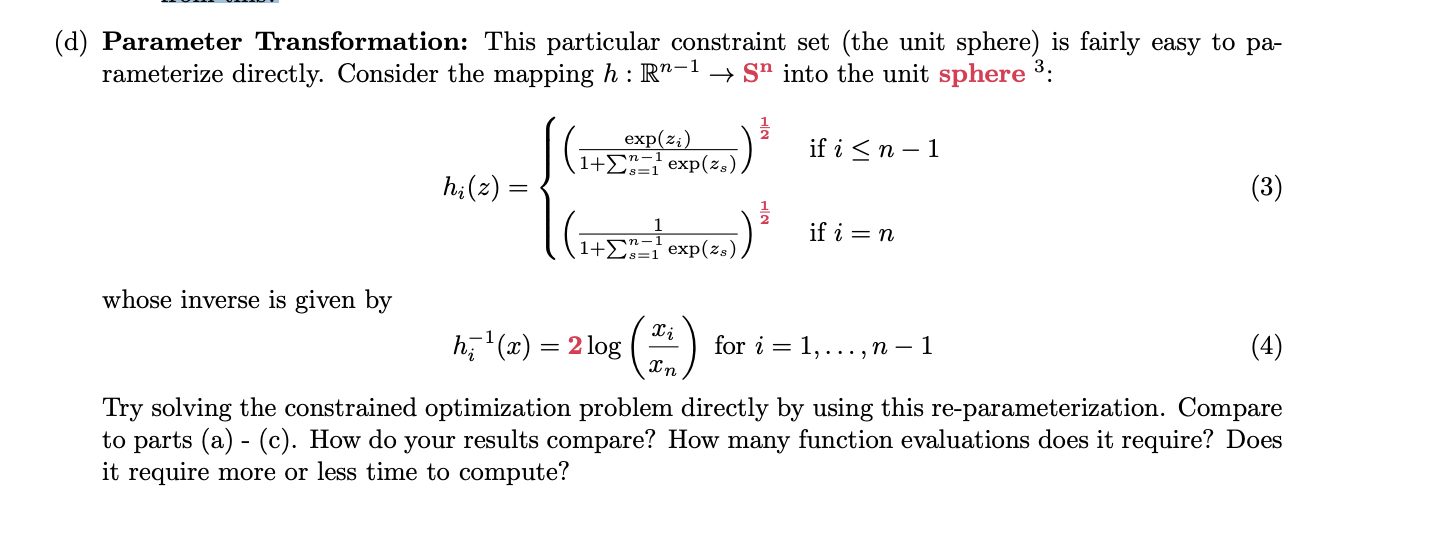

In [20]:
def f(x: np.ndarray, a: float, b: float) -> float:
    return sum(a * (1 - x[:-1])**2 + b * (x[1:] - x[:-1]**2)**2)

a=1.0
b=100.0

def h(z):
    zeros = np.zeros(len(z) + 1)
    for i in range(len(zeros)):
        if i != (len(zeros)-1):
            zeros[i]=np.sqrt(np.exp(z[i]) / (1 + np.sum(np.exp(z)))) 
        else:
            zeros[i] = np.sqrt(1 / (1 + np.sum(np.exp(z))))
    return zeros

def h_inv(x):
    ones = np.zeros(len(x)-1)
    for i in range(len(x)-1):
        if x[i] > 0 and x[-1] > 0:
            ones[i] = 2 * np.log(x[i]/x[-1])
        else:
            ones[i] = np.nan
    return ones

# Define the objective function
def obj_func(x):
    return f(h_inv(x),a,b)

# Define the initial guess
n = 10
x0 = h(np.ones(n))

# Solve the transformed problem
result = minimize(obj_func, x0)
print(result)


# Transform the solution back to the original parameter space
z_star = h_inv(result.x)
print(z_star)

      fun: 4.4817160177868733e-29
 hess_inv: array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])
      jac: array([2.47807494e-04, 3.09604868e-04, 3.09604868e-04, 3.09604868e-04,
       3.09604868e-04, 3.09604868e-04, 3.09604868e-04, 3.09604868e-04,
       3.09604868e-04, 6.17973746e-05, 1.52696203e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 216
      nit: 0
     njev: 17
   status: 2
  success: False
        x: array([0.3105668 , 0.3105668 , 0.3105668 , 0.3105668 , 0.3105668 ,
       0.3105668 , 0.3105668 , 0.3105668 , 0.3105668 , 0.3

### Comment
Solving the problem set using the re-parameterization is significantly faster than either the augmented lagrangian approach or the penalty method. Part D requires only 216 function evaluations, this is significantly lower than the 341 found in part ci) and 880 in part bii). Therefore, this method is much more computationally efficient and faster to execute. 

### Intuition
Parameter transformation is a technique used in optimization to transform the variables or parameters of an optimization problem to simplify the problem or to make it easier for optimization algorithms. Parameter transformation involves re-parameterizing the original problem by introducing new variables or by transforming the existing variables in a way that preserves the structure of the problem.
Parameter transformation can be used to convert a non-linear optimization problem into a linear or convex problem, which can be then be solved easier using standard optimization techniques. It can also be used to eliminate constraints or to reduce the number of constraints in the problem.
Parameter transformation can also be used to improve the numerical stability of optimization algorithms. For example, if the variables in the optimization problem have very different scales, it can lead to numerical issues in the optimization algorithm. In this case, the variables can be transformed to have similar scales, which can improve the convergence of the optimization algorithm.
Overall, parameter transformation is a useful technique in optimization that can simplify the problem or improve the numerical stability of the optimization algorithm.


## Question 2 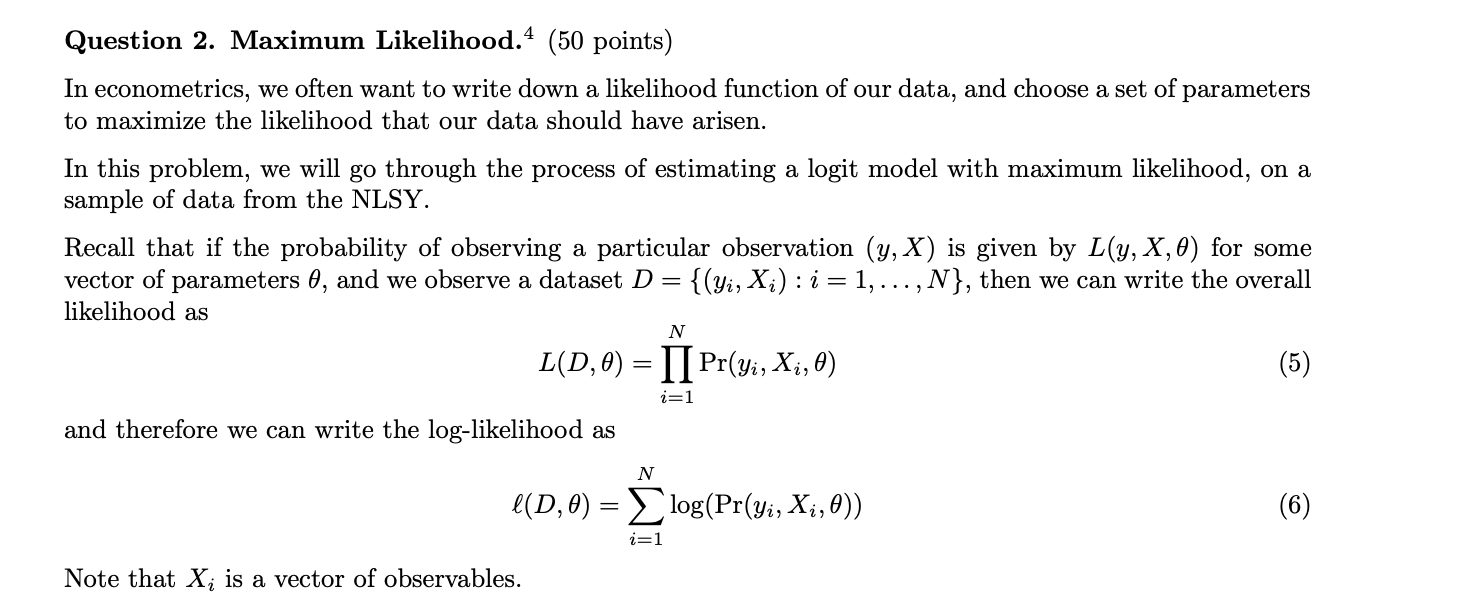

### Part A)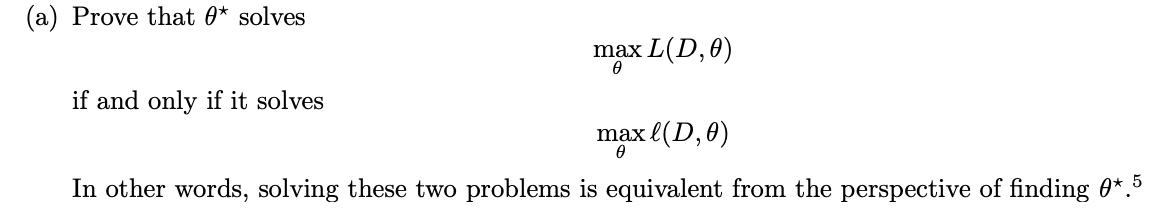

In [21]:
'''
Assume that θ* solves max L(D, θ) - but not max l(D, θ), which means there exists some other θ' such that:

l(D, θ*) < l(D, θ')

             
Therefore...

log(p(D|θ*)) + log(p(θ*)) < log(p(D|θ')) + log(p(θ'))




Taking the exponential of both sides:

p(D|θ*) * p(θ*) < p(D|θ') * p(θ')




Since log is a strictly increasing function, if l(D, θ*) < l(D, θ'), then log(p(D|θ*)) < log(p(D|θ')), which implies p(D|θ*) < p(D|θ').
                                                                                                                                 
                                                                                                                                 
                                                                                                                                 
Likelihood ratio:

p(D|θ*) / p(D|θ')

Since p(θ*) and p(θ') are both positive constants, we can simplify the inequality above as follows:

p(D|θ*) / p(D|θ') < 1 / 1 = 1
            
            
            

Multiplying both sides by p(θ') and using the fact that p(D|θ') * p(θ') = likelihood l(D, θ'), we get:

p(D|θ*) * p(θ') < l(D, θ')

But we also know that p(D|θ*) * p(θ*) = l(D, θ*), so:

p(D|θ*) * p(θ') < l(D, θ*) ... (1)

            

Therefore...

p(D|θ') * p(θ*) < l(D, θ') ... (2)

Adding (1) and (2) together, we get:

p(D|θ*) * p(θ') + p(D|θ') * p(θ*) < l(D, θ*) + l(D, θ')
                                                 
                                                 

We know that p(θ*) + p(θ') = 1, so p(θ') = 1 - p(θ*). Substituting this into the inequality above and simplifying, we get:

p(D|θ*) < p(D|θ')

This contradicts our earlier assumption that p(D|θ*) > p(D|θ'), so our original assumption that θ* solves max L(D, θ) but not max l(D, θ) must be false. Therefore, we can conclude that if θ* solves max L(D, θ), it must also solve max l(D, θ), and vice versa.
                                                         
 '''  


"\nAssume that θ* solves max L(D, θ) - but not max l(D, θ), which means there exists some other θ' such that:\n\nl(D, θ*) < l(D, θ')\n\n             \nTherefore...\n\nlog(p(D|θ*)) + log(p(θ*)) < log(p(D|θ')) + log(p(θ'))\n\n\n\n\nTaking the exponential of both sides:\n\np(D|θ*) * p(θ*) < p(D|θ') * p(θ')\n\n\n\n\nSince log is a strictly increasing function, if l(D, θ*) < l(D, θ'), then log(p(D|θ*)) < log(p(D|θ')), which implies p(D|θ*) < p(D|θ').\n                                                                                                                                 \n                                                                                                                                 \n                                                                                                                                 \nLikelihood ratio:\n\np(D|θ*) / p(D|θ')\n\nSince p(θ*) and p(θ') are both positive constants, we can simplify the inequality above as follows:\n\np(D|θ*) / p

### Part B)
 Comment on why you might prefer to work with the log-likelihood function instead of the regular
likelihood

In [22]:
'''
Working with the log-likelihood function l instead of the regular likelihood has several advantages:

Numerical stability: The likelihood function involves multiplying a large number of probabilities together, which can result in underflow or overflow errors, especially when dealing with large datasets. Taking the logarithm of the likelihood function avoids these issues by converting the product into a sum, making computations more stable and less prone to numerical errors.

Simplification of algebraic expressions: The logarithmic function has several useful algebraic properties, such as log(ab) = log(a) + log(b) and log(a/b) = log(a) - log(b), which can be used to simplify complex expressions involving likelihood functions.

Optimization: The log-likelihood function is a concave function, which means that it has a unique maximum value. This makes it easier to optimize using gradient-based methods such as gradient descent or stochastic gradient descent, since the gradient of the log-likelihood function is simpler and more computationally efficient to compute than the gradient of the likelihood function.

Statistical interpretation: Taking the logarithm of the likelihood function does not change the location of the maximum likelihood estimate, but it does change the scale. In other words, the maximum of the log-likelihood function is in the same place as the maximum of the likelihood function, but the log-likelihood function puts more weight on differences between the observed data and the model's predictions that are relatively small in magnitude. This can make it easier to interpret the statistical significance of the maximum likelihood estimate.

'''


"\nWorking with the log-likelihood function l instead of the regular likelihood has several advantages:\n\nNumerical stability: The likelihood function involves multiplying a large number of probabilities together, which can result in underflow or overflow errors, especially when dealing with large datasets. Taking the logarithm of the likelihood function avoids these issues by converting the product into a sum, making computations more stable and less prone to numerical errors.\n\nSimplification of algebraic expressions: The logarithmic function has several useful algebraic properties, such as log(ab) = log(a) + log(b) and log(a/b) = log(a) - log(b), which can be used to simplify complex expressions involving likelihood functions.\n\nOptimization: The log-likelihood function is a concave function, which means that it has a unique maximum value. This makes it easier to optimize using gradient-based methods such as gradient descent or stochastic gradient descent, since the gradient of t

### Part C)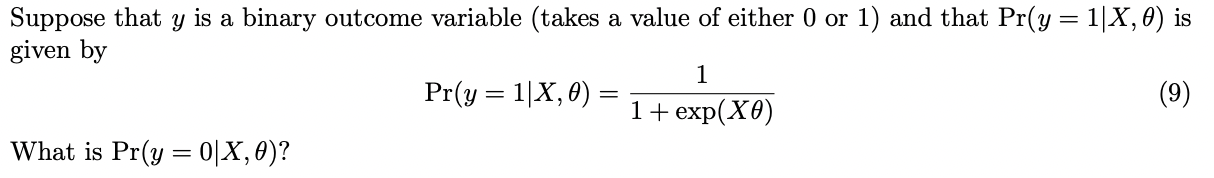

In [23]:
'''

The probability of y being equal to 0 given X and θ is:

Pr(y = 0|X, θ) = 1 - Pr(y = 1|X, θ)

Using the expression given for Pr(y = 1|X, θ)...

Pr(y = 0|X, θ) = 1 - Pr(y = 1|X, θ)


= 1 - 1/(1 + exp(Xθ))
= (1 + exp(Xθ))/(1 + exp(Xθ)) - 1/(1 + exp(Xθ))
= (1 - 1)/(1 + exp(Xθ))
= 0/(1 + exp(Xθ))
= 0

Therefore, the probability of y being equal to 0 given X and θ is 0. This makes sense since y is a binary outcome variable that can only take on the values 0 or 1, and the probabilities of the two possible outcomes must add up to 1.


'''

'\n\nThe probability of y being equal to 0 given X and θ is:\n\nPr(y = 0|X, θ) = 1 - Pr(y = 1|X, θ)\n\nUsing the expression given for Pr(y = 1|X, θ)...\n\nPr(y = 0|X, θ) = 1 - Pr(y = 1|X, θ)\n\n\n= 1 - 1/(1 + exp(Xθ))\n= (1 + exp(Xθ))/(1 + exp(Xθ)) - 1/(1 + exp(Xθ))\n= (1 - 1)/(1 + exp(Xθ))\n= 0/(1 + exp(Xθ))\n= 0\n\nTherefore, the probability of y being equal to 0 given X and θ is 0. This makes sense since y is a binary outcome variable that can only take on the values 0 or 1, and the probabilities of the two possible outcomes must add up to 1.\n\n\n'

### Part D
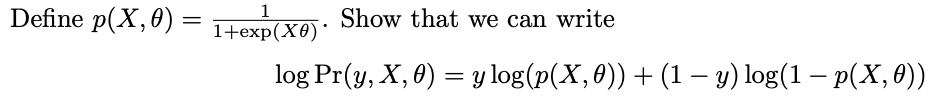

In [24]:
''' 
To show that we can write log Pr(y, X, θ) = y log(p(X, θ)) + (1 − y) log(1 − p(X, θ)), we first need to show that the likelihood can be written as L(y, X, θ) = p(X, θ)^y *((1 − p(X, θ))^1−y):

If y = 1, then the likelihood is:

L(y=1, X, θ) = Pr(y = 1|X, θ) = p(X, θ)

If y = 0, then the likelihood is:

L(y=0, X, θ) = Pr(y = 0|X, θ) = 1 - p(X, θ)

Therefore, we can write the likelihood as:

L(y, X, θ) = p(X, θ)^y * (1 - p(X, θ))^(1-y)

Now we can take the logarithm of the likelihood to get:

log L(y, X, θ) = y * log p(X, θ) + (1-y) * log (1 - p(X, θ))

'''

' \nTo show that we can write log Pr(y, X, θ) = y log(p(X, θ)) + (1 − y) log(1 − p(X, θ)), we first need to show that the likelihood can be written as L(y, X, θ) = p(X, θ)^y *((1 − p(X, θ))^1−y):\n\nIf y = 1, then the likelihood is:\n\nL(y=1, X, θ) = Pr(y = 1|X, θ) = p(X, θ)\n\nIf y = 0, then the likelihood is:\n\nL(y=0, X, θ) = Pr(y = 0|X, θ) = 1 - p(X, θ)\n\nTherefore, we can write the likelihood as:\n\nL(y, X, θ) = p(X, θ)^y * (1 - p(X, θ))^(1-y)\n\nNow we can take the logarithm of the likelihood to get:\n\nlog L(y, X, θ) = y * log p(X, θ) + (1-y) * log (1 - p(X, θ))\n\n'

### Part E)


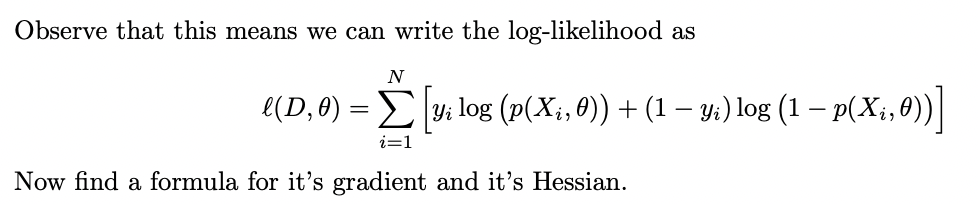

In [25]:
'''
Gradient:

∇l(θ) = Xᵀ(p - y)

where X is the N × (p+1) design matrix, p is the N × 1 vector of predicted probabilities given by p(X,θ) = σ(Xθ), σ is the logistic function, y is the N × 1 vector of observed binary outcomes, and ᵀ denotes the transpose operator.

Hessian:

Hl(θ) = XᵀWX

where W is the N × N diagonal matrix of weights given by W = diag(p(1-p)), and diag(v) is the diagonal matrix with the vector v on its diagonal.
'''


'\nGradient:\n\n∇l(θ) = Xᵀ(p - y)\n\nwhere X is the N × (p+1) design matrix, p is the N × 1 vector of predicted probabilities given by p(X,θ) = σ(Xθ), σ is the logistic function, y is the N × 1 vector of observed binary outcomes, and ᵀ denotes the transpose operator.\n\nHessian:\n\nHl(θ) = XᵀWX\n\nwhere W is the N × N diagonal matrix of weights given by W = diag(p(1-p)), and diag(v) is the diagonal matrix with the vector v on its diagonal.\n'

### Part F)
 Now download the attached data file (either in dta format or as a csv). This is an extract from the
NLSY79, which follows a cohort of people over their lifecycle. Take a look at the data and make sure
you understand it’s structure. Plot some things that look informative to you

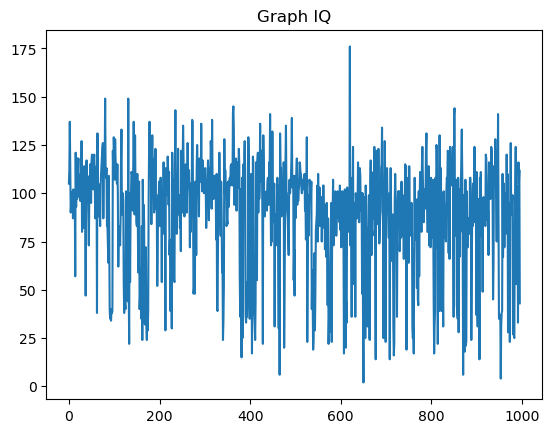

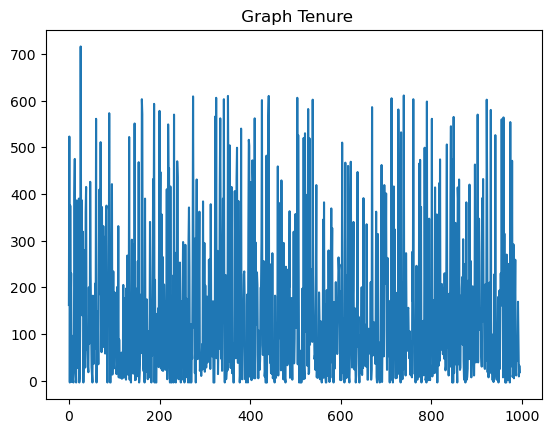

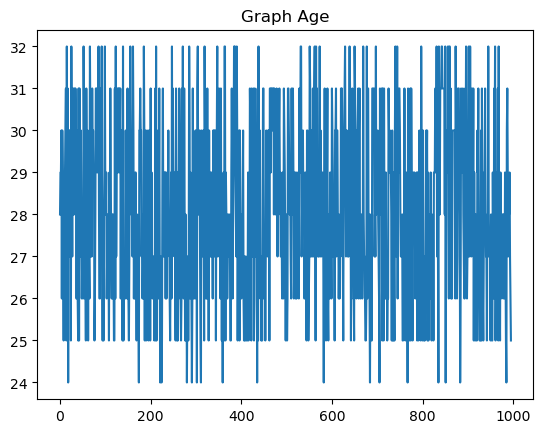

In [26]:
data = pd.read_csv('/Users/jamie/Downloads/data.csv')

IQ_Plot = data['IQ']  #Plot IQ
plt.plot(IQ_Plot)
plt.title('Graph IQ')
plt.show()

tenure_Plot = data['tenure']  #Plot tenure
plt.plot(tenure_Plot)
plt.title(' Graph Tenure')
plt.show()

age_Plot = data['age']    #Plot age
plt.plot(age_Plot)
plt.title('Graph Age')
plt.show()


### Comment
Graph IQ exhibits a trend fluctuating around the mean of 100. There are some outliers in the data which exhibit very low y values

Graph Age follows a cubic trend around an approximate mean of 28.

### Part H)
Use your preferred optimization routine to solve for the value of θ which maximizes the log-likelihood
and report the values.

In [28]:
neg_log_likelihood = lambda theta: -log_likelihood(theta, X, y) #We then created a function which takes theta as input and returns a negative log-likelihood

#The negative sign is used because the minimize function looks for the minimum value of the objective function, while we want to find the maximum likelihood estimate of the parameters. Therefore, maximizing the negative of the log-likelihood is equivalent to minimizing the log-likelihood.

result = minimize(neg_log_likelihood, theta_guesses[1], method='BFGS') #This line calls the minimize function and passes the neg_log_likelihood function as the objective function to be minimized. The theta_guesses[1] is the initial guess for the optimal parameters theta..
print('Optimized parameter values:', result.x) #The minimize function returns an object result that contains the optimal parameter values.



Optimized parameter values: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1.]


### Part I)
Try it with several other algorithms (make sure you use Newton’s Method, L-BGFGS, and NelderMead). Restart it several times from different initial conditions. Do you converge to the same answer?

In [29]:
neg_log_likelihood = lambda theta: -log_likelihood(theta, X, y) #Same as before (see line 286)

methods = ['Nelder-Mead', 'BFGS', 'L-BFGS-B', 'TNC', 'COBYLA', 'SLSQP'] #In this line, we list different optimization methods which can utilise the minimize function

for method in methods:
    print('Method:', method)
    result = minimize(neg_log_likelihood, theta_guesses[0], method=method)
    print('Optimized parameter values:', result.x)
    print('Negative log-likelihood:', result.fun)
    print()
    

Method: Nelder-Mead
Optimized parameter values: [ 0.84849705  1.78661405  0.83746682 -1.7768559   2.05837804 -0.1722731
 -0.32189794  0.01687158  3.03120686 -2.03039765  1.06705524 -1.41226489
 -1.31434197  5.18397499  0.03622723 -1.41298337 -0.1862236  -4.33519995
 -1.83603501 -4.01383842  1.58836647 -5.34489285  5.0881209  -4.82983773
  3.00320906  1.13042288  2.3386102   1.2937629   2.1402577  -5.3382384
 -2.65781826]
Negative log-likelihood: 206.96047973632812

Method: BFGS
Optimized parameter values: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
Negative log-likelihood: 690.3746337890625

Method: L-BFGS-B
Optimized parameter values: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
Negative log-likelihood: 690.3746337890625

Method: TNC
Optimized parameter values: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
Negative log-likelihood: 690

### Comment
As a result of the problems in part g, we do not find that these minimization routines converge to the true minimum.